In [1]:
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd

In [302]:
df = pd.read_csv('covid19_tweets.csv')

In [303]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [304]:
df = df.drop(['hashtags','user_description','source'],axis=1)

In [305]:
sia = SentimentIntensityAnalyzer()


In [306]:
def sentiment(x):
    overall_sentiment = ''
    if x['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif x['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
    return overall_sentiment

In [308]:
df['Sentiment'] = df['text'].apply(lambda x: sentiment(sia.polarity_scores(x)))

In [309]:
df['date'] = df['date'].apply(lambda x: x.split(" ")[0])

In [310]:
df['date'] = pd.to_datetime(df['date'])

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
import re
from gensim.parsing.preprocessing import remove_stopwords
from wordcloud import WordCloud
import nltk

In [312]:
df['text'] = df['text'].str.lower().str.replace('[^\w\s]','')
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [315]:
import collections

In [335]:
c = collections.Counter()
for i in df[df['Sentiment'] == 'Positive']['text']:
  x = i.rstrip().split(" ")
  c.update(set(zip(*(x[i:] for i in range(2)))))

In [336]:
dff = pd.DataFrame.from_records(list(dict(c).items()), columns=['Twogram','Frequency']).sort_values('Frequency',ascending = False)

[Text(0.5, 1.0, 'Twograms Frequency from Positive Tweets')]

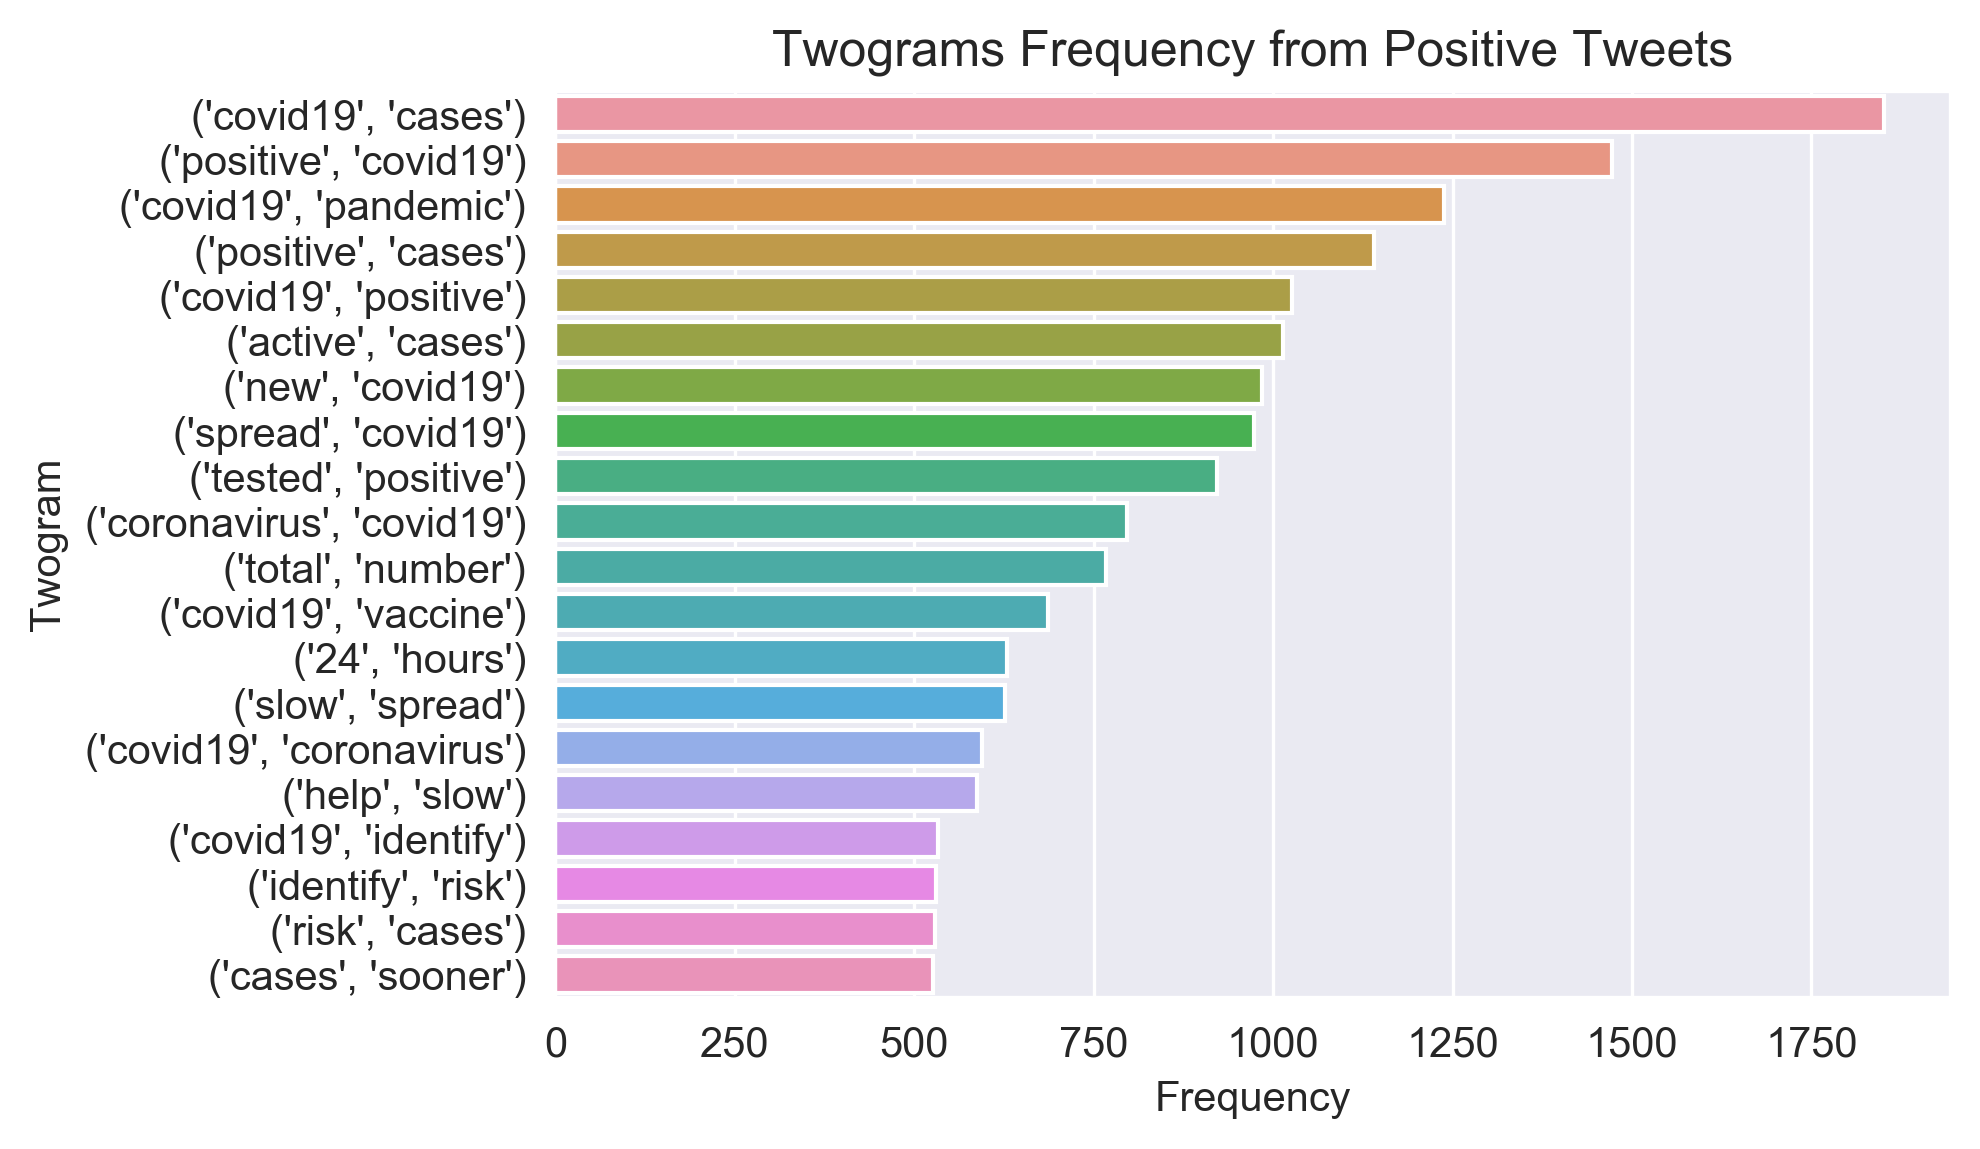

In [337]:
sns.barplot(x="Frequency", y="Twogram", data=dff.head(20)).set(title = 'Twograms Frequency from Positive Tweets')

In [324]:
c = collections.Counter()
for i in df[df['Sentiment'] == 'Negative']['text']:
  x = i.rstrip().split(" ")
  c.update(set(zip(*(x[i:] for i in range(2)))))

[Text(0.5, 1.0, 'Twograms Frequency from Negative Tweets')]

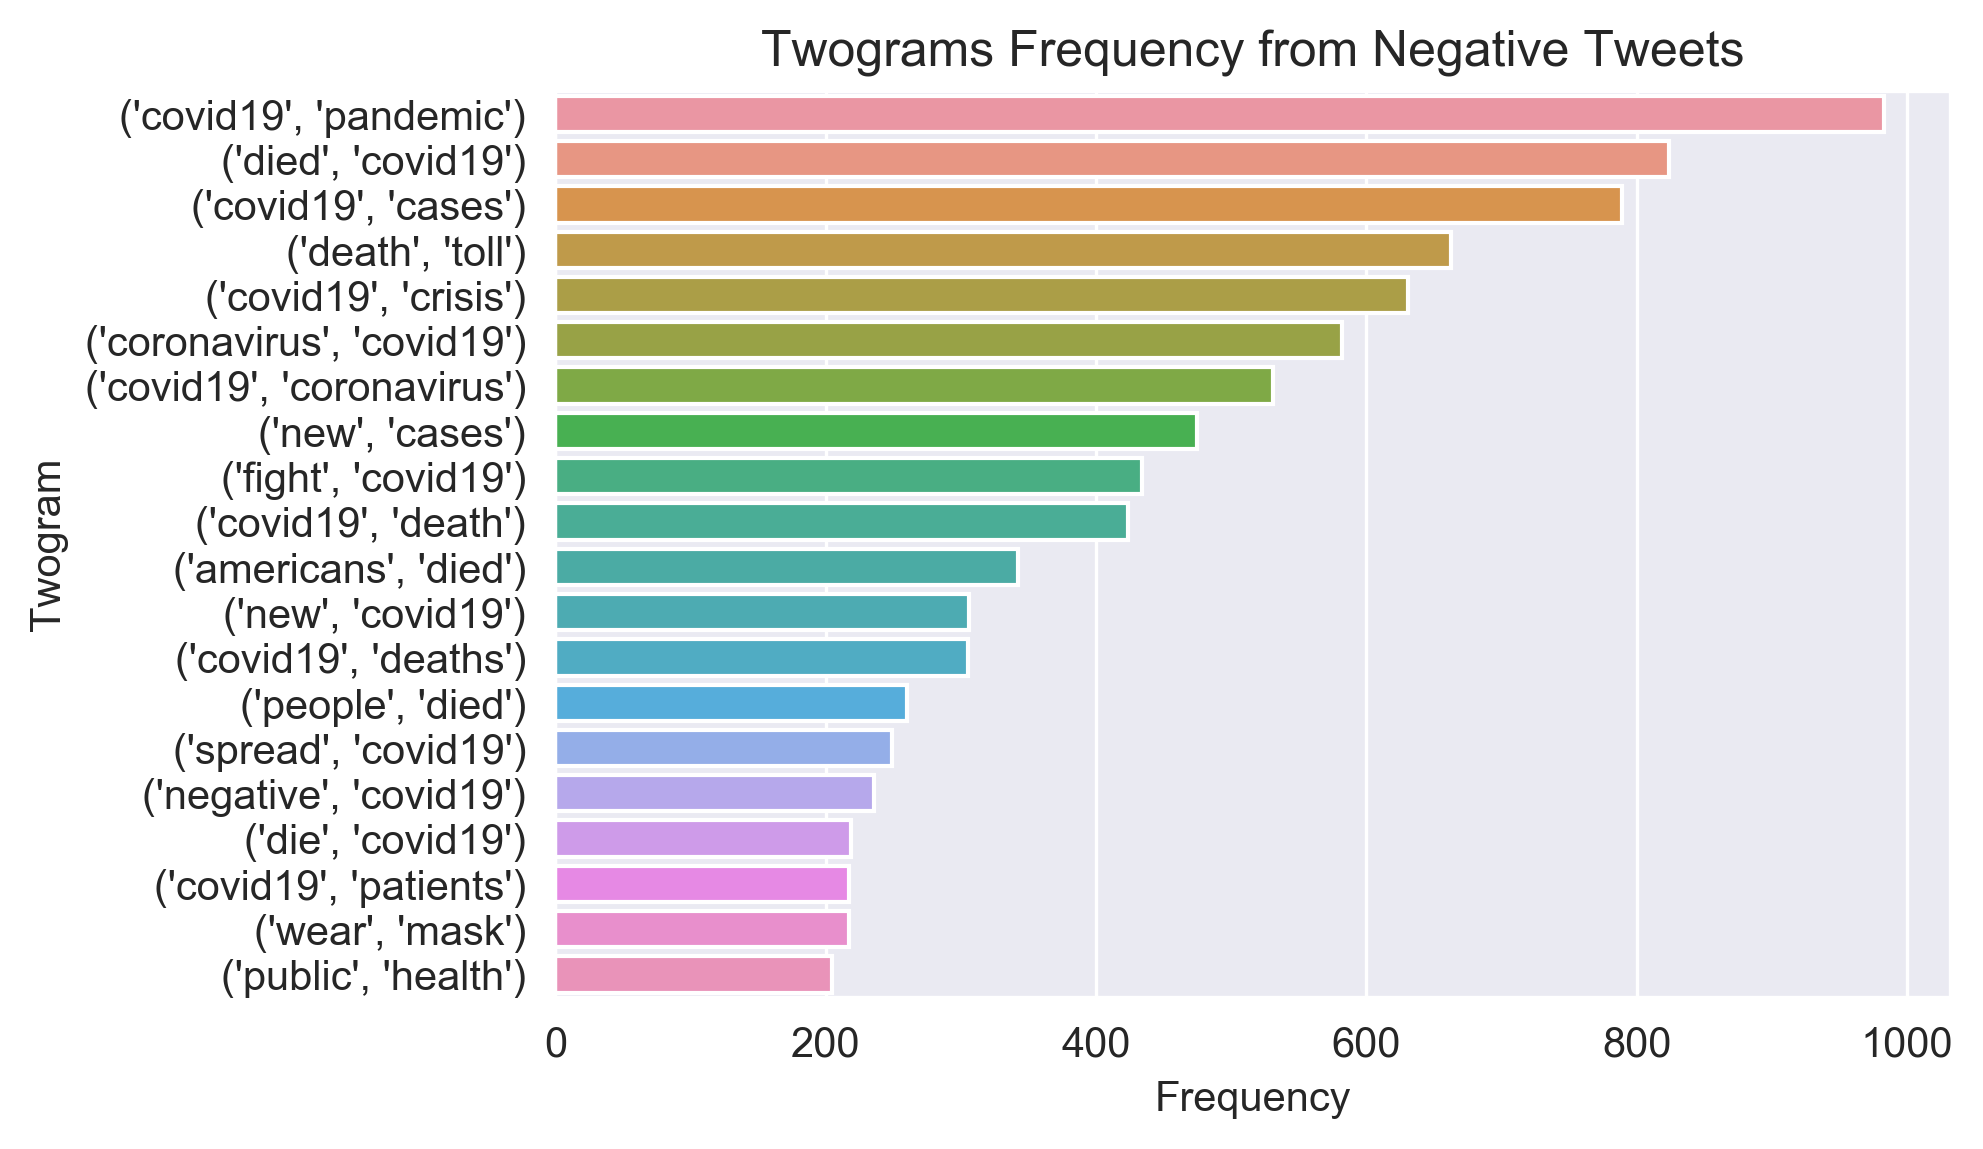

In [329]:
dff = pd.DataFrame.from_records(list(dict(c).items()), columns=['Twogram','Frequency']).sort_values('Frequency',ascending = False)
sns.barplot(x="Frequency", y="Twogram", data=dff.head(20)).set(title = 'Twograms Frequency from Negative Tweets')

In [345]:
c = collections.Counter()
for i in df[df['Sentiment'] == 'Positive']['text']:
  x = i.rstrip().split(" ")
  c.update(set(zip(*(x[i:] for i in range(3)))))

In [346]:
dfff = pd.DataFrame.from_records(list(dict(c).items()), columns=['Threegram','Frequency']).sort_values('Frequency',ascending = False)

[Text(0.5, 1.0, 'Threegrams Frequency from Positive Tweets')]

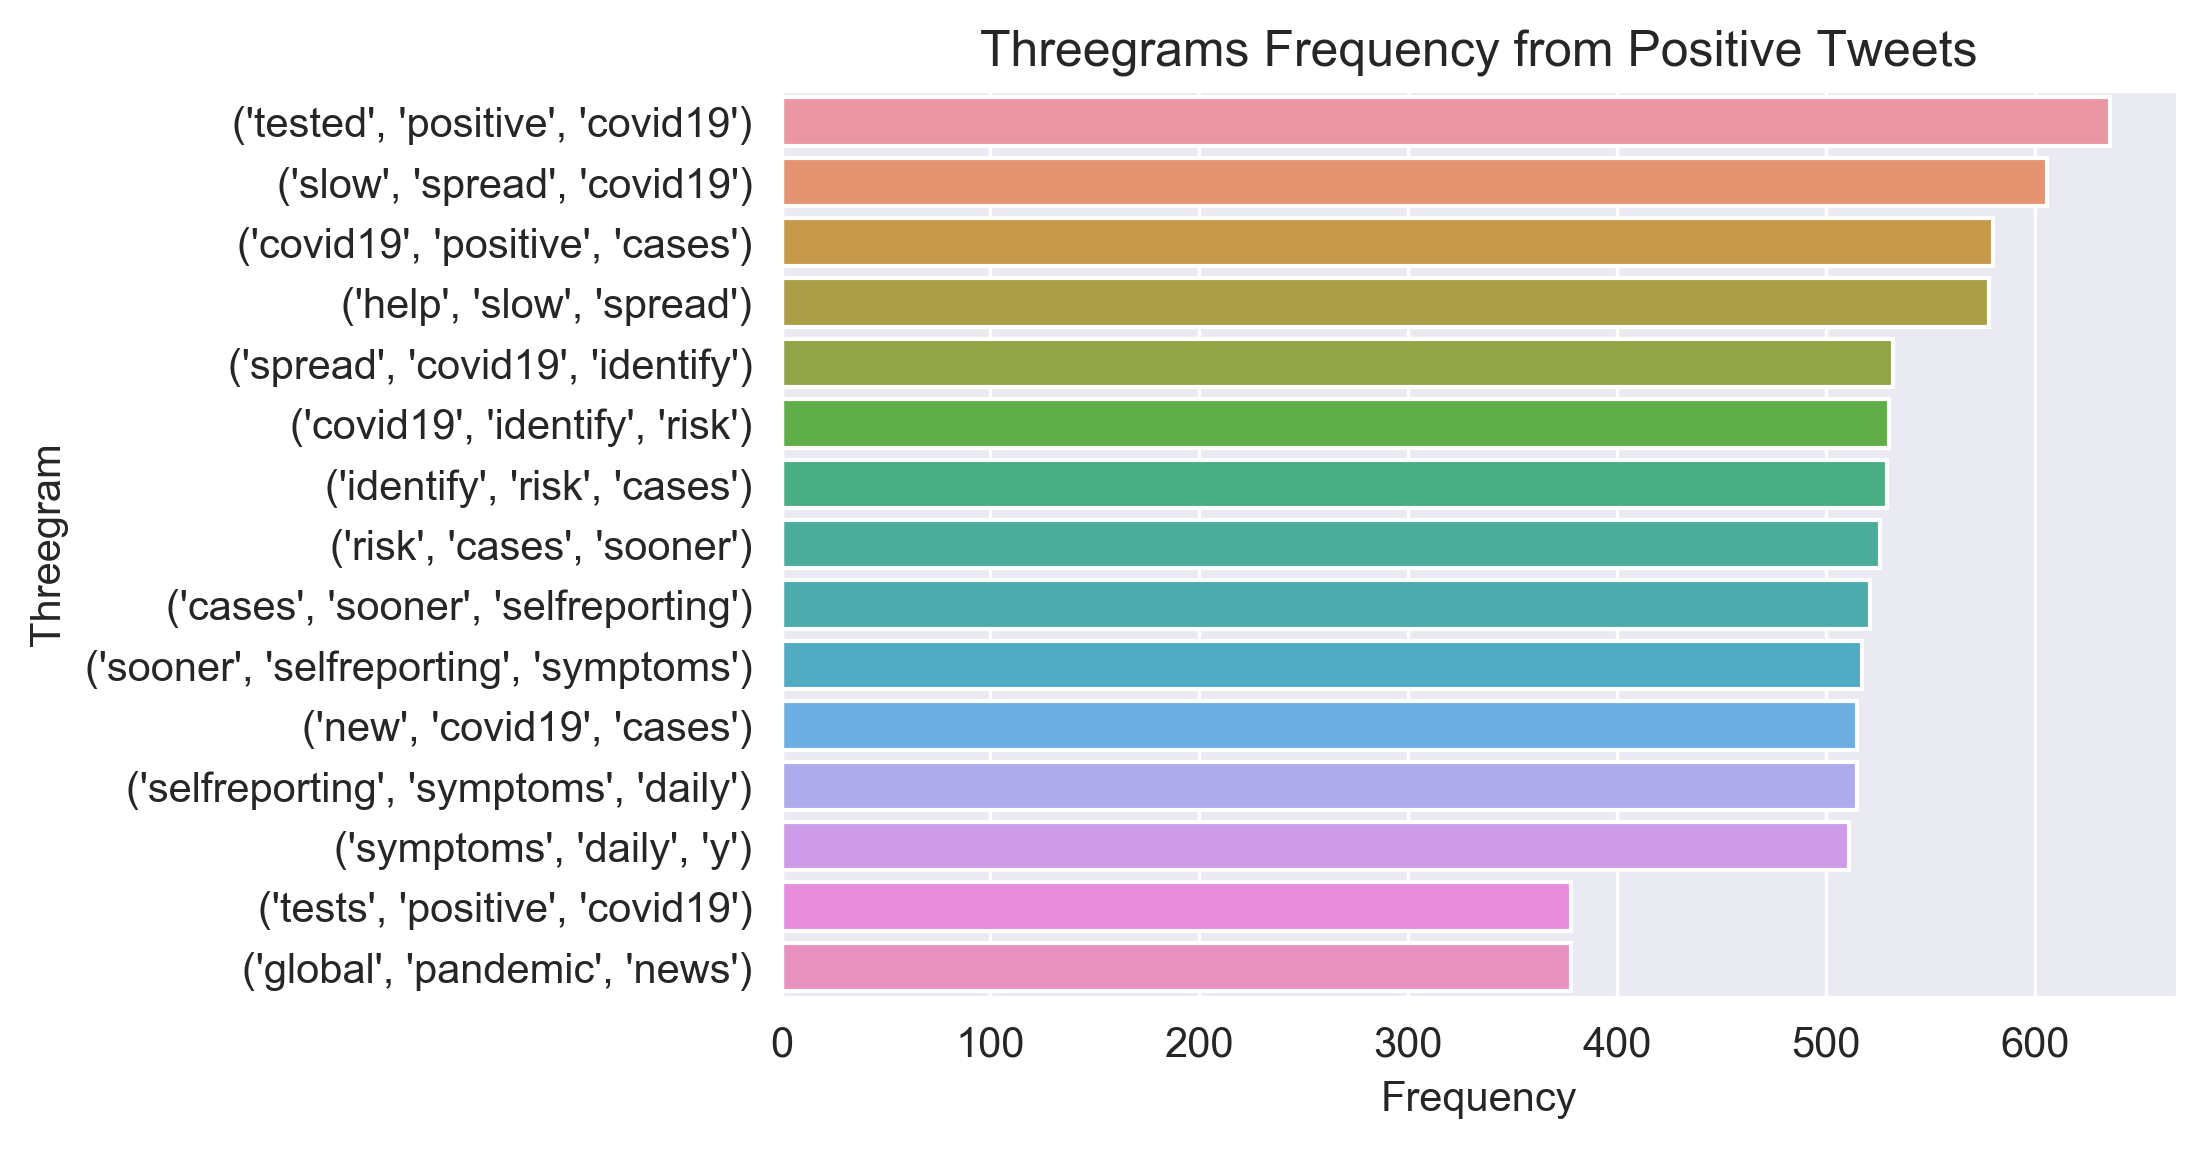

In [347]:
sns.barplot(x="Frequency", y="Threegram", data=dfff.head(15)).set(title = 'Threegrams Frequency from Positive Tweets')

In [341]:
c = collections.Counter()
for i in df[df['Sentiment'] == 'Negative']['text']:
  x = i.rstrip().split(" ")
  c.update(set(zip(*(x[i:] for i in range(3)))))

In [342]:
dfff = pd.DataFrame.from_records(list(dict(c).items()), columns=['Threegram','Frequency']).sort_values('Frequency',ascending = False)

[Text(0.5, 1.0, 'Threegrams Frequency from Negative Tweets')]

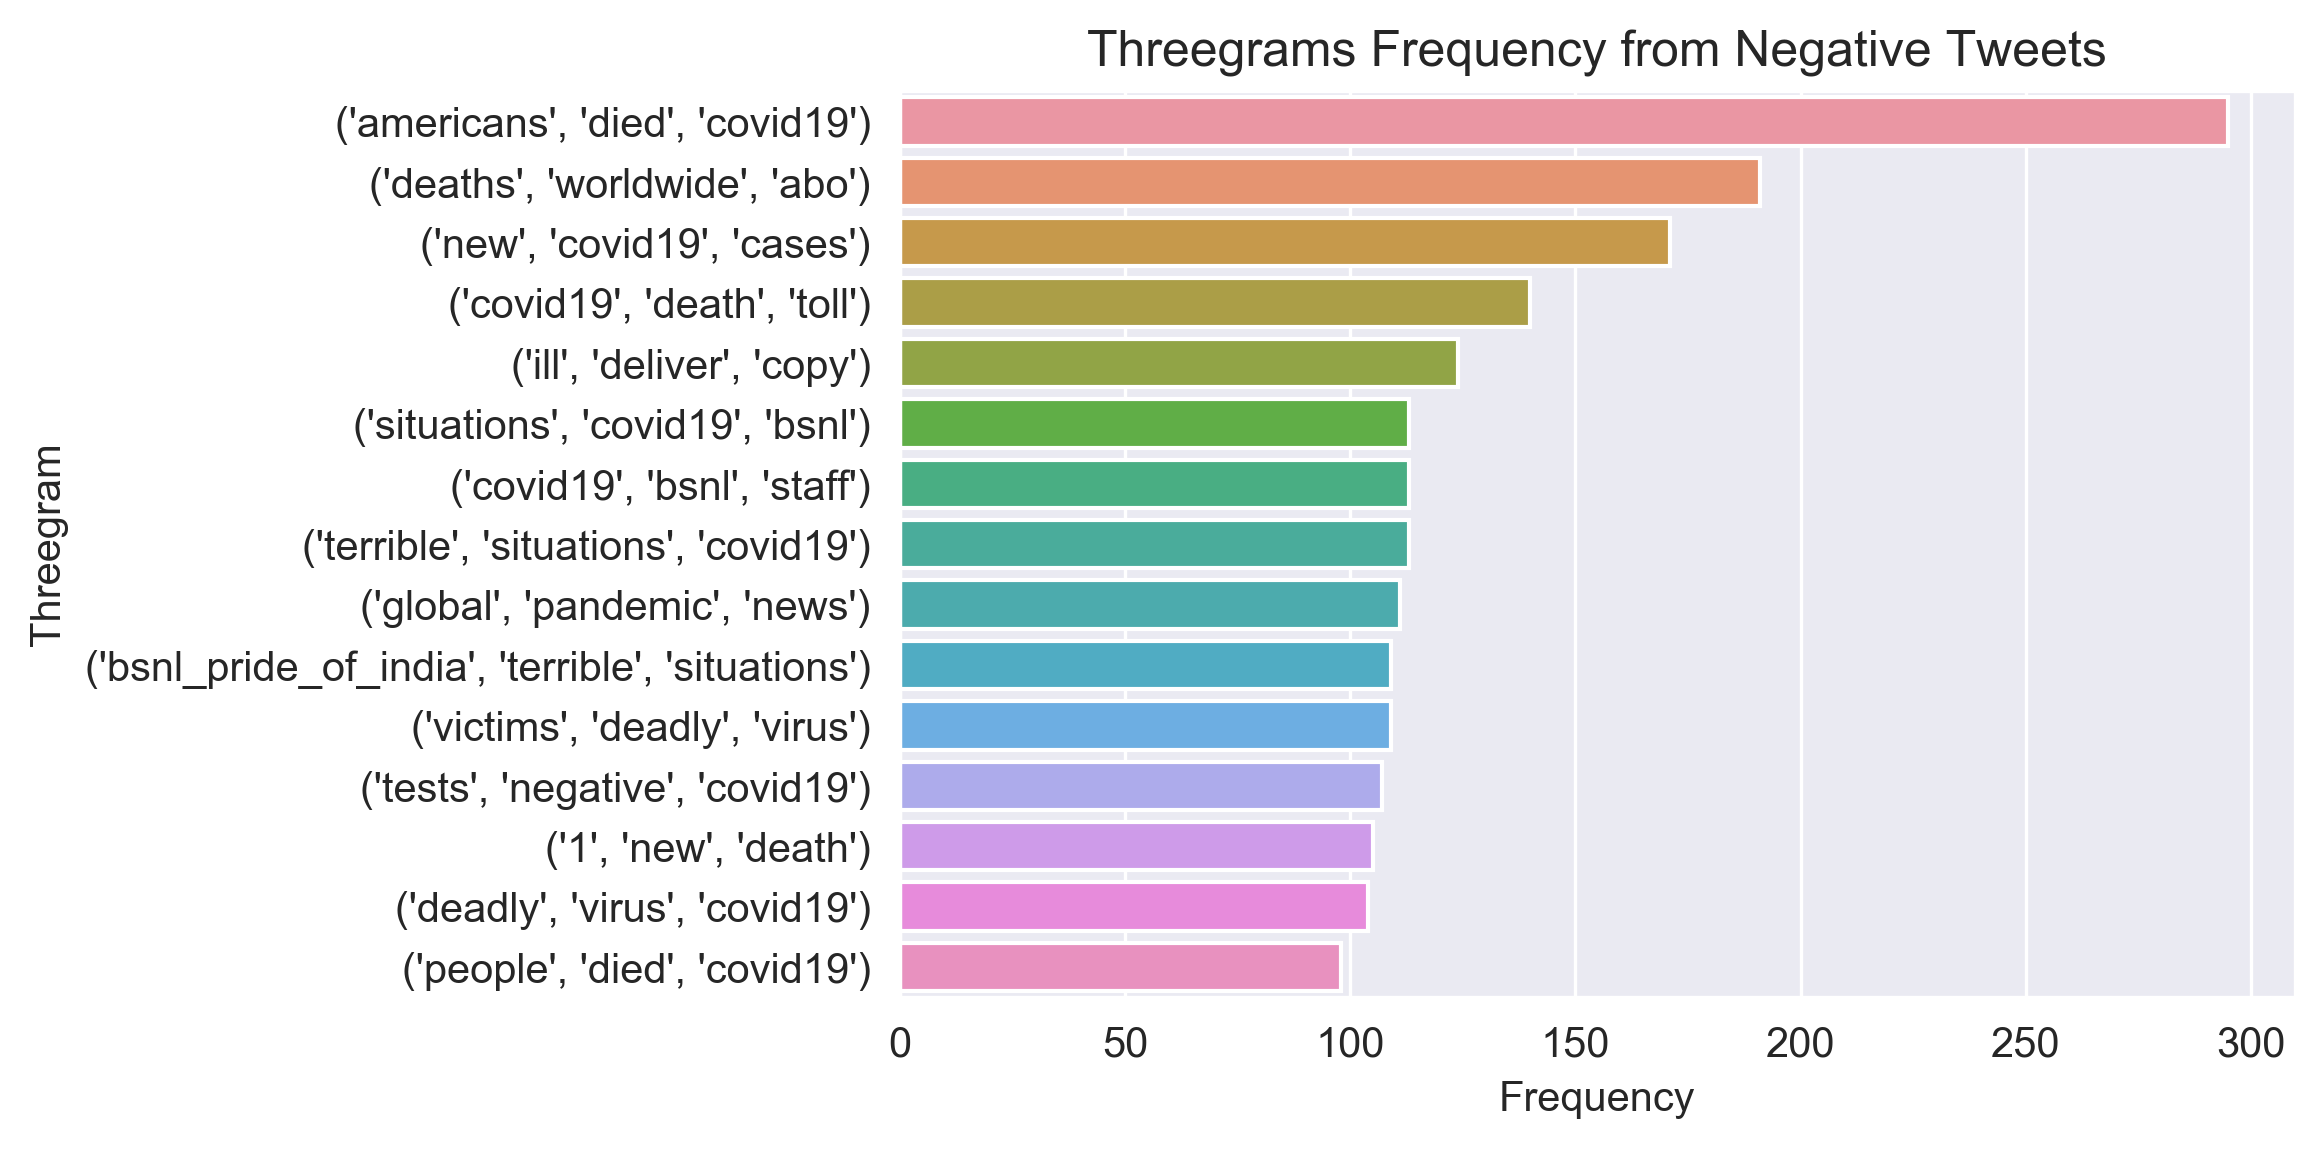

In [344]:
sns.barplot(x="Frequency", y="Threegram", data=dfff.head(15)).set(title = 'Threegrams Frequency from Negative Tweets')

In [175]:
data = pd.read_csv('sentiments_emotions_Singapore.csv')

In [156]:
data

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion
0,1221964317542637568,721910587,wuhan,2020-01-28 01:12:50,0.354,0.498,0.529,0.219,0.475,-1,A
1,1221974677993582595,124380298,wuhan,2020-01-28 01:54:01,0.520,0.572,0.410,0.307,0.459,0,NaN
2,1221974756112637952,19013879,wuhan,2020-01-28 01:54:19,0.350,0.552,0.472,0.201,0.464,-1,F
3,1221975111982432257,1020701817783455746,wuhan,2020-01-28 01:55:44,0.434,0.572,0.392,0.271,0.468,-1,F
4,1221975881364557825,886374620,wuhan,2020-01-28 01:58:47,0.371,0.714,0.486,0.244,0.579,-1,F
...,...,...,...,...,...,...,...,...,...,...,...
483701,1532330064976629761,27378369,covid,2022-06-02 11:55:31,0.487,0.439,0.347,0.304,0.360,0,NaN
483702,1532330591978688513,1334745884102311936,covid,2022-06-02 11:57:37,0.649,0.387,0.426,0.546,0.415,1,H
483703,1532330650053005312,91080855,covid,2022-06-02 11:57:50,0.536,0.419,0.438,0.423,0.400,1,H
483704,1532330812124692480,27378369,covid,2022-06-02 11:58:29,0.494,0.490,0.365,0.317,0.380,0,NaN


In [176]:
data['tweet_timestamp'] = data['tweet_timestamp'].apply(lambda x: x.split(" ")[0])
data['tweet_timestamp'] = pd.to_datetime(data['tweet_timestamp'])

In [177]:
data = data.loc[(data['tweet_timestamp'] > '2020-03-16') & (data['tweet_timestamp']<= '2020-10-20')]

In [178]:
data['sentiment'].value_counts()

-1    78659
 1    54559
 0    30365
-2     4823
 2     1248
Name: sentiment, dtype: int64

In [246]:
data

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,posneg
31251,1239703056599732230,19332967,covid,2020-03-17,0.470,0.414,0.400,0.222,0.386,-1,F,-1
31252,1239703132487077888,38400130,covid,2020-03-17,0.584,0.407,0.336,0.455,0.342,1,H,1
31253,1239703137021095937,38400130,covid,2020-03-17,0.452,0.534,0.375,0.276,0.389,-1,F,-1
31254,1239703141118967808,38400130,covid,2020-03-17,0.392,0.492,0.519,0.228,0.428,-1,A,-1
31255,1239703197481988096,2506473625,covid,2020-03-17,0.507,0.438,0.463,0.329,0.457,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
200900,1318700672871813120,1200474236,covid,2020-10-20,0.487,0.373,0.380,0.280,0.375,0,NaN,0
200901,1318701032914911232,366024127,covid,2020-10-20,0.396,0.511,0.426,0.202,0.429,-1,F,-1
200902,1318701309789429760,2963651068,covid,2020-10-20,0.544,0.327,0.367,0.308,0.298,1,H,1
200903,1318701750648401920,366024127,covid,2020-10-20,0.534,0.342,0.374,0.382,0.328,1,H,1


In [182]:
data['posneg'] = data['sentiment'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

In [245]:
data.groupby(['tweet_timestamp'])['tweet_timestamp'].count().sum()

169654

In [244]:
data.groupby(['tweet_timestamp'])['posneg'].sum()

tweet_timestamp
2020-03-17   -355
2020-03-18   -437
2020-03-19   -374
2020-03-20   -240
2020-03-21   -348
             ... 
2020-10-16    -99
2020-10-17    -58
2020-10-18    -93
2020-10-19    -88
2020-10-20    -11
Name: posneg, Length: 218, dtype: int64

In [203]:
data1 = (data.groupby(['tweet_timestamp'])['posneg'].sum()/data.groupby(['tweet_timestamp'])['tweet_timestamp'].count()).to_frame(name='positivity').reset_index()

In [223]:
data1['count'] = data.groupby(['tweet_timestamp'])['posneg'].count().tolist()

In [227]:
data1 = data1.rename(columns={"tweet_timestamp": "date"})

In [228]:
data1

,date,positivity,count
0,2020-03-17,-0.317248,1119
1,2020-03-18,-0.271766,1608
2,2020-03-19,-0.307566,1216
3,2020-03-20,-0.182371,1316
4,2020-03-21,-0.221233,1573
...,...,...,...
213,2020-10-16,-0.190751,519
214,2020-10-17,-0.170088,341
215,2020-10-18,-0.272727,341
216,2020-10-19,-0.181070,486


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-pa

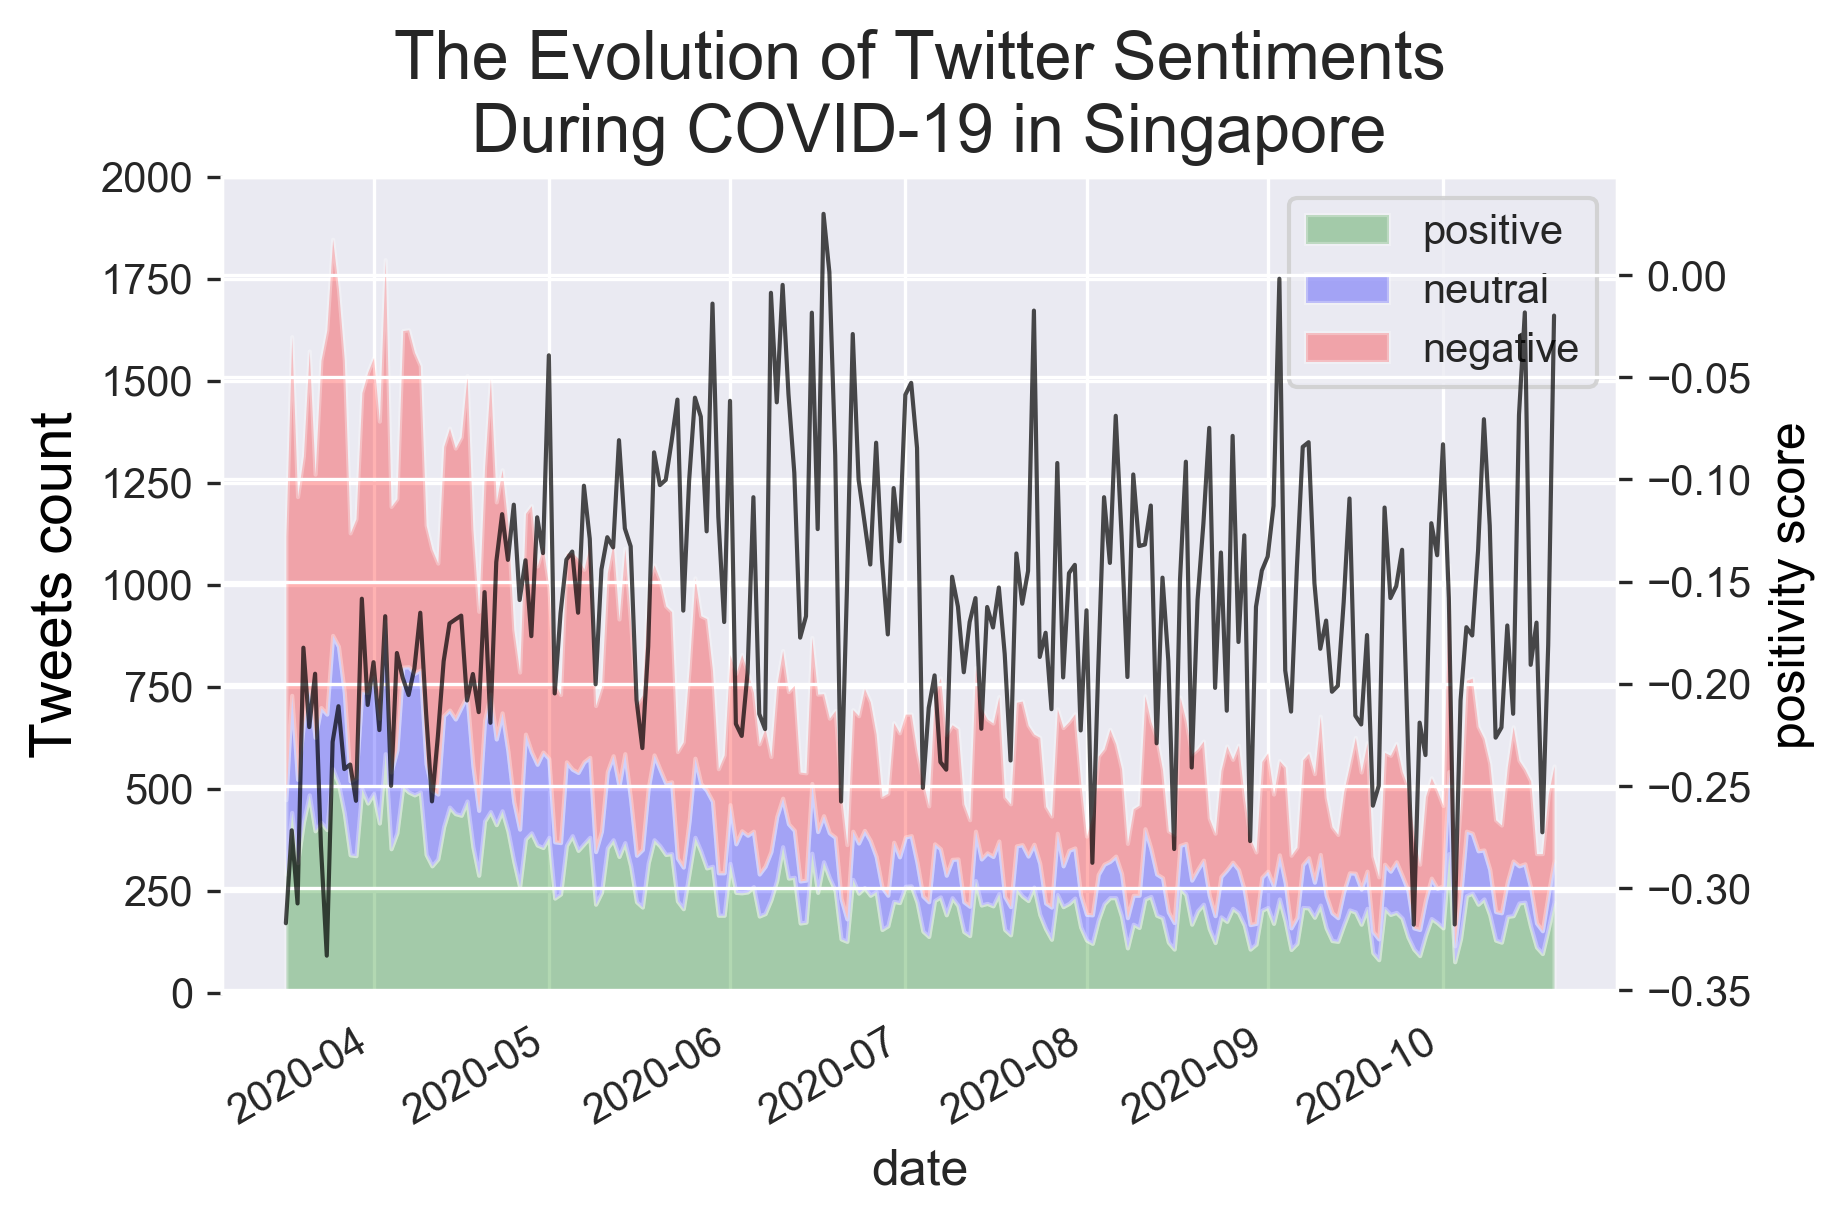

In [351]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.stackplot(data1.date,
        data1['pos'],
        data1['neu'],
        data1['neg'],
        labels=['positive','neutral','negative'],
        colors=['green','blue','red'],
        alpha=0.3)
# set x-axis label
ax.set_xlabel("date", fontsize = 12)
# set y-axis label
ax.set_ylabel("Tweets count",
              color="black",
              fontsize=14)
ax.set_ylim(0, 2000)
ax.set_title('The Evolution of Twitter Sentiments\n During COVID-19 in Singapore',fontsize = 16)
ax.legend(loc='best')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data1.date, data1['positivity'],color="black",linewidth=1,alpha = 0.7)
ax2.set_ylabel("positivity score",color="black",fontsize=12)

fig.autofmt_xdate()

plt.rcParams["figure.dpi"] = 300
plt.show()

In [263]:
data1['pos'] = data.groupby(['tweet_timestamp'])['posneg'].apply(lambda x: (x>0).sum()).tolist()
data1['neu'] = data.groupby(['tweet_timestamp'])['posneg'].apply(lambda x: (x==0).sum()).tolist()
data1['neg'] = data.groupby(['tweet_timestamp'])['posneg'].apply(lambda x: (x<0).sum()).tolist()

In [350]:
data1.sort_values('positivity')

,date,positivity,count,pos,neu,neg
7,2020-03-24,-0.333128,1624,400,283,941
193,2020-09-26,-0.317949,390,107,52,231
200,2020-10-03,-0.317857,280,76,39,165
0,2020-03-17,-0.317248,1119,291,182,646
2,2020-03-19,-0.307566,1216,319,204,693
...,...,...,...,...,...,...
83,2020-06-08,-0.008636,579,228,118,233
85,2020-06-10,-0.004768,839,358,119,362
170,2020-09-03,-0.001757,569,230,108,231
93,2020-06-18,0.001486,673,282,110,281


In [262]:
data.groupby(['tweet_timestamp'])['posneg'].apply(lambda x: (x<0).sum()).tolist()

[646,
 879,
 693,
 658,
 833,
 645,
 851,
 941,
 971,
 876,
 815,
 608,
 635,
 733,
 785,
 783,
 728,
 886,
 651,
 616,
 825,
 826,
 787,
 746,
 585,
 591,
 566,
 660,
 691,
 664,
 662,
 785,
 580,
 488,
 621,
 774,
 581,
 596,
 556,
 422,
 385,
 541,
 603,
 486,
 505,
 420,
 387,
 363,
 511,
 531,
 525,
 472,
 523,
 358,
 354,
 487,
 522,
 408,
 503,
 431,
 370,
 379,
 500,
 466,
 464,
 434,
 417,
 261,
 307,
 374,
 442,
 411,
 421,
 321,
 255,
 289,
 368,
 418,
 432,
 400,
 340,
 319,
 338,
 233,
 323,
 362,
 324,
 356,
 267,
 263,
 358,
 337,
 299,
 281,
 311,
 258,
 182,
 298,
 312,
 348,
 340,
 300,
 222,
 250,
 293,
 304,
 301,
 298,
 272,
 281,
 235,
 370,
 419,
 344,
 330,
 319,
 240,
 212,
 401,
 370,
 328,
 327,
 354,
 244,
 252,
 352,
 352,
 321,
 270,
 309,
 237,
 223,
 305,
 339,
 316,
 329,
 276,
 192,
 247,
 290,
 283,
 324,
 275,
 257,
 182,
 212,
 221,
 326,
 311,
 333,
 265,
 199,
 216,
 364,
 302,
 309,
 296,
 292,
 189,
 202,
 260,
 304,
 252,
 305,
 227,
 212,
 175

In [255]:
data.groupby(['tweet_timestamp'])['posneg'].count()

tweet_timestamp
2020-03-17    1119
2020-03-18    1608
2020-03-19    1216
2020-03-20    1316
2020-03-21    1573
              ... 
2020-10-16     519
2020-10-17     341
2020-10-18     341
2020-10-19     486
2020-10-20     556
Name: posneg, Length: 218, dtype: int64